### 1️⃣ Introduction — Hierarchical Clustering 🔗

**Hierarchical Clustering** is an **unsupervised learning algorithm** used to group similar data points into a hierarchy (tree-like structure).  

- **Goal:** create a tree of clusters called a **dendrogram**.  
- **Type:** Agglomerative (bottom-up) or Divisive (top-down).  
- **Applications:** gene expression analysis, document clustering, customer segmentation.

Key characteristics:
- Does **not require specifying the number of clusters** initially (can cut dendrogram at desired level).  
- Can reveal multi-level cluster structure.  
- Sensitive to distance metric and linkage method.


### 2️⃣ Types of Hierarchical Clustering 🌳

1. **Agglomerative (Bottom-Up):**  
   - Each data point starts as its own cluster.  
   - Iteratively merge the closest clusters until one cluster remains.

2. **Divisive (Top-Down):**  
   - Start with all points in one cluster.  
   - Iteratively split clusters until each cluster contains one point.

**Linkage Methods (Distance between clusters):**  
- **Single linkage:** distance between closest points.  
- **Complete linkage:** distance between farthest points.  
- **Average linkage:** average distance between all pairs.  
- **Ward’s method:** minimize increase in total within-cluster variance.


### 3️⃣ Distance Metric & Equations ✏️

Let clusters $A$ and $B$, points $x_i \in A$, $x_j \in B$.

1. **Single linkage:**  

$$
d(A,B) = \min_{i \in A, j \in B} \| x_i - x_j \|
$$

2. **Complete linkage:**  

$$
d(A,B) = \max_{i \in A, j \in B} \| x_i - x_j \|
$$

3. **Average linkage:**  

$$
d(A,B) = \frac{1}{|A||B|} \sum_{i \in A} \sum_{j \in B} \| x_i - x_j \|
$$

4. **Ward linkage (variance):**  

$$
d(A,B) = \frac{|A||B|}{|A|+|B|} \| \mu_A - \mu_B \|^2
$$

where $\mu_A, \mu_B$ are cluster centroids.


### 4️⃣ Step-by-Step Algorithm — Agglomerative Clustering 🧩

1. Start with **each point as a separate cluster**.  
2. Compute pairwise **distance matrix** between all clusters.  
3. Merge the two closest clusters based on linkage method.  
4. Update distance matrix to reflect the new cluster.  
5. Repeat steps 2–4 until all points are merged into a single cluster.  
6. Draw a **dendrogram** to visualize hierarchy.  
7. Optionally, **cut the dendrogram** at desired level to form clusters.


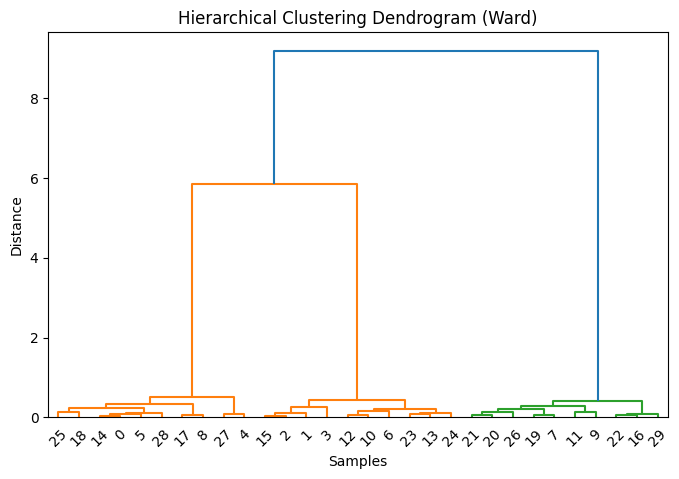

In [1]:
### 5️⃣ Hierarchical Clustering Example (Agglomerative)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Generate dataset
X, _ = make_blobs(n_samples=30, centers=3, cluster_std=0.60, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

# Compute linkage matrix (Ward linkage)
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(8,5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


### 6️⃣ Cutting the Dendrogram ✂️

- After building dendrogram, choose **cut height** to define clusters.  
- Cluster assignment is based on which branches are connected **below the cut**.  

**Equation (cluster assignment):**  

$$
C_i = \text{cluster to which data point } x_i \text{ belongs after cutting dendrogram at height } h
$$

- Height selection can be done by visual inspection or using **max number of clusters**.


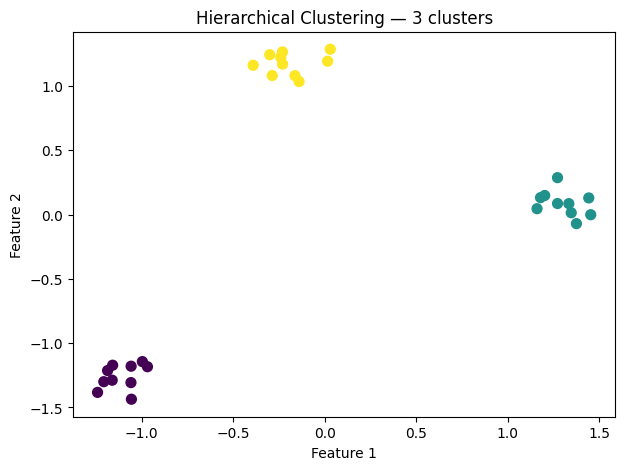

In [2]:
### 7️⃣ Form Clusters from Dendrogram
from scipy.cluster.hierarchy import fcluster

# Cut dendrogram at max 3 clusters
max_clusters = 3
clusters = fcluster(linked, t=max_clusters, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap='viridis', s=50)
plt.title(f'Hierarchical Clustering — {max_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


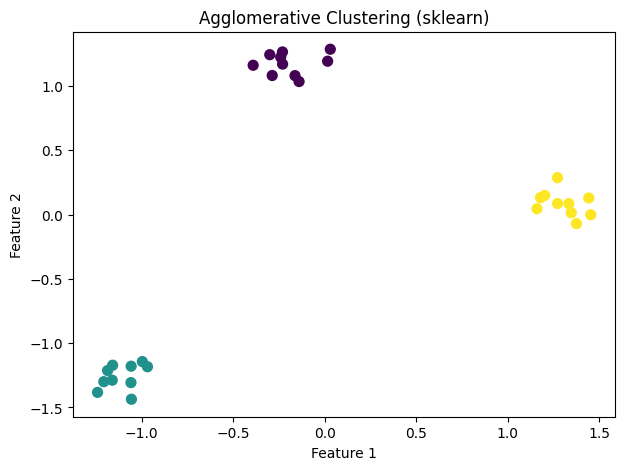

In [4]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Fit AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # no affinity needed
y_agg = agg.fit_predict(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_agg, cmap='viridis', s=50)
plt.title('Agglomerative Clustering (sklearn)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




### 9️⃣ Advantages & Limitations ✅

**Advantages:**
- No need to specify number of clusters initially (can cut dendrogram).  
- Provides full hierarchy — useful for multi-level patterns.  
- Can handle non-spherical clusters better than K-Means.

**Limitations:**
- Computationally expensive for large datasets (O(n²) memory/time).  
- Sensitive to **noise and outliers**.  
- Sensitive to **choice of linkage and distance metric**.

**Best Use Cases:**
- Small to medium datasets.  
- Gene expression, document clustering, hierarchical segmentation.  
- Visual exploration of cluster structure.


### 🔟 Summary & Best Practices 🧭

- **Step 1:** Scale features to standardize data.  
- **Step 2:** Choose linkage method (Ward for variance, others for shape).  
- **Step 3:** Compute linkage matrix and plot dendrogram.  
- **Step 4:** Decide number of clusters by cutting dendrogram.  
- **Step 5:** Validate clusters using silhouette score or domain knowledge.  

**Tips:**
- Use `scipy` for dendrogram visualization.  
- Use `sklearn.AgglomerativeClustering` for cluster assignment.  
- For large datasets, consider **approximate methods** or **K-Means** as alternative.
